# KNNClassifier

## Importing Packages

In [51]:
import pandas as pd
import numpy as np
from collections import Counter
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

In [37]:
def count1(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0]

## Reading CSV file

In [38]:
df = pd.read_csv('train.csv',header=None)
df1=df.iloc[:,:].values
columns=list(df1[:,11])
print(len(columns))
val=count1(columns)
val1=ord(val)-97
print(val1)

4496
1


In [39]:
switcher={
         'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,
          'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,
           'u':20,'v':21,'w':22,'x':23,'y':24,'z':25,'?':val1,
       }

### Encoding of chars

In [40]:
df=df.applymap(lambda x: switcher.get(x))
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4,10,18,13,5,13,0,2,1,24,...,18,14,14,15,13,14,15,1,2,11
1,4,10,18,6,5,13,5,22,1,15,...,18,22,22,15,22,19,15,22,18,6
2,4,1,18,6,5,13,5,22,1,22,...,18,22,22,15,22,19,15,22,18,6
3,4,18,5,6,5,13,5,2,13,13,...,18,22,22,15,22,14,15,13,21,20
4,4,5,5,6,5,13,5,22,1,15,...,5,22,22,15,22,14,4,13,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491,15,23,24,24,5,5,5,2,1,15,...,10,13,13,15,22,14,11,7,24,6
4492,15,5,24,4,5,24,5,2,13,1,...,10,15,22,15,22,14,4,22,21,3
4493,15,23,24,6,5,5,5,2,1,7,...,10,15,15,15,22,14,11,7,24,15
4494,15,23,24,4,5,5,5,2,13,1,...,18,22,15,15,22,14,4,22,21,3


In [41]:
def train_test_split(df,test_size):
    if(isinstance(test_size,float)==False):
        print('pass test_size in percent/100')
        return
    test_size=math.floor(len(df)*test_size)
    size=len(df)-test_size
    global test_frame
    global train_frame
    global test_labels
    global train_labels
    test_frame=df.iloc[size:,1:].values
    train_frame=df.iloc[:size,1:].values
    test_labels=df.iloc[size:,:1].values
    train_labels=df.iloc[:size,:1].values
    print(test_frame.shape)
    print(train_frame.shape)

## Distance Metrics

### Eucledian Distance

In [42]:
def EucledianDist(train_frame,test_frame,train_labels,k):
    predicted_label=[]
    for i in test_frame:
        result=[]
        index=0
        for j in train_frame:
            eudist=0.0
            val=np.linalg.norm(i-j)
            result.append((val,train_labels[index][0]))
            index+=1
        result.sort()
#         print(result)
        klist=[]
        for p in range(0,k):
            klist.append(result[p][1])
#             print(klist)
        resval=count1(klist)
#         resval=max(set(klist),key=klist.count)
        predicted_label.append(resval)
    return predicted_label 

In [43]:
def findAccuracy(predLabels,actualLabels):
    count=0
    actualSize=len(actualLabels)
    #print(actualSize)
    for i in range(len(predLabels)):
        if(predLabels[i]==actualLabels[i]):
            count+=1
    accuracy=(count/actualSize)*100
    print(accuracy)

# Accuracy for Training Set

In [46]:
train_test_split(df,.5)
print(len(test_labels))
predlist=EucledianDist(train_frame,test_frame,train_labels,3)
print(len(predlist))
findAccuracy(predlist,test_labels)

(2248, 22)
(2248, 22)
2248
2248
99.19928825622776


## Performance Metrics

### Confusion Matrix

In [48]:
mat=confusion_matrix(test_labels,predlist)
print(mat)

[[   0    0]
 [  18 2230]]


### F1 Score

In [49]:
score=f1_score(predlist,test_labels, average='micro')
print(score)

0.9919928825622776


### Graphs

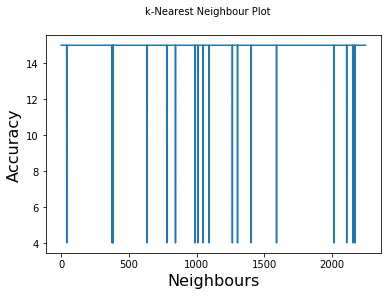

In [52]:
plt.figure(0)
plt.suptitle('k-Nearest Neighbour Plot', fontsize=10)
plt.plot(predlist)
plt.xlabel('Neighbours', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.rcParams['figure.figsize']=20,6
plt.show()

## Random Guessing Technique

In [53]:
import random  
predListRandomguessing =[random.randrange(0, 10, 1) for i in range(len(test_labels))]
# print(predListRandomguessing)
findAccuracy(predListRandomguessing,test_labels)

0.0


## MajorityGuessing Technique

In [54]:
import statistics
from statistics import mode
df1=pd.read_csv('train.csv',header=None)
train_test_split(df1,.2)
listOfTrainLabels=[]
for i in train_labels:
    listOfTrainLabels.append(i[0])
val=mode(listOfTrainLabels)
print(val)
predListMajorityVoting=[val]*len(test_labels)
# print(predList)
findAccuracy(predListMajorityVoting,test_labels)

(899, 22)
(3597, 22)
p
100.0


## Accuracy using Scikit Learn library kNN classifier : 

In [67]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
df1=pd.read_csv('train.csv',header=None)
output=df1.iloc[0:,0]
x_train=df1.iloc[0:,1:]
# print(output)
def BuiltInKNN(k):
        nearSat = KNeighborsClassifier(n_neighbors=k)
        nearSat.fit(x_train,output)
        y_pred = nearSat.predict(x_train)
        print(metrics.accuracy_score(output, y_pred))
        
BuiltInKNN(3)

1.0
